# Music Recommender - C318


---
Este software tem como objetivo apresentar e estudar como é feita a classificação e indicação das músicas relacionadas a alguns aplicativos, tais como o spotify.

Basicamente queremos entender como o spotify faz para recomendar as músicas para um usuário baseado na suas músicas mais ouvidas, ou nas músicas anteriores


## Spotify API

Abaixo estão listadas as características importantes de uma música que a API do spotify leva em consideração, são elas:

* Acousticness/Acústica: Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* Danceability/Dançabilidade: Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* Duration_ms:Variável numérica, a duração da trilha em milissegundos.

* Duration_min: Variável numérica, a duração da faixa em minutos.

* Energy/Energia: Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* Explicit/Explícito: Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* Id: O ID do Spotify para a faixa.

* Instrumentalness/Instrumentalidade: Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* Key/Chave:Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* Liveness/ Ao vivo: Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* Loudness/ Volume em dB: Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* Mode/ Modo: Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* Popularity/Popularidade: Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* Speechiness/Fala: Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* Tempo: Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* Valence/Valência: Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* Year/Ano: Ano em que a música foi lançada.

## Análise dos dados

Serão usadas três bases de dados principais:
* Dados gerais das músicas
* Dados relacionados a gêneros musicais.
* Dados relacionados aos anos de lançamento das músicas

In [3]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd

In [4]:
# Fazendo a leitura e submissão dos csv em dataframes para tratamentos futuros

dados = pd.read_csv('https://raw.githubusercontent.com/G-ilian/C318-MusicRecommender/main/Datasets/general_data.csv?token=GHSAT0AAAAAACFW4BXBEX5RGKXTZ57RBOFWZLQXCXQ')
dados_gen = pd.read_csv('https://raw.githubusercontent.com/G-ilian/C318-MusicRecommender/main/Datasets/data_by_genres.csv?token=GHSAT0AAAAAACFW4BXB5PGFGDBGLV4GKI4MZLQXBUQ')
dados_year= pd.read_csv('https://raw.githubusercontent.com/G-ilian/C318-MusicRecommender/main/Datasets/data_by_year.csv?token=GHSAT0AAAAAACFW4BXBTUAKFRSJEG6L622QZLQXCKQ')




### Dados Gerais

In [5]:
# Apresentando o cabeçalho dos dados gerais
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [6]:
# Verificando o tamanho do dataset
dados.shape

(20311, 19)

In [7]:
'''
Eliminando algumas colunas que julgamos não ser tão necessárias por enquanto
'''
dados = dados.drop(columns=["explicit","key","mode"],axis=1)

In [8]:
# Validando se as colunas que informamos foram realmente excluídas
dados.shape

(20311, 16)

In [9]:
# Verificando se existem dados nulos
dados.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

### Dados por gênero

In [10]:
# Apresentando o cabeçalho dos dados por gênero musical
dados_gen.head(2)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5

In [11]:
# Verificando o tamanho do dataset
dados_gen.shape

(2973, 14)

In [12]:
'''
Eliminando algumas colunas que julgamos não ser tão necessárias por enquanto
'''
dados_gen = dados_gen.drop(columns=["key","mode"],axis=1)

In [13]:
# Validando se as colunas que informamos foram realmente excluídas
dados_gen.shape

(2973, 12)

In [14]:
# Verificando se existem dados nulos
dados_gen.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

### Dados por ano

In [15]:
# Apresentando o cabeçalho dos dados por ano de lançamento
dados_year.head(2)

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

In [16]:
# Verificando o tamanho do dataset
dados_year.shape

(100, 14)

In [17]:
'''
Eliminando algumas colunas que julgamos não ser tão necessárias por enquanto
'''
dados_year = dados_year.drop(columns=["key","mode"],axis=1)

In [18]:
# Validando se as colunas que informamos foram realmente excluídas
dados_year.shape

(100, 12)

In [19]:
# Verificando de qual ano são as músicas
dados_year["year"].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [20]:
# Criando um limitador dos anos para ter somente dados a partir de 2000
dados_year=dados_year[dados_year["year"]>=2000]
dados_year["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [21]:
# Resetando index
dados_year.reset_index()

index  year  acousticness  danceability    duration_ms    energy  \
0      79  2000      0.289323      0.590918  242724.642638  0.625413   
1      80  2001      0.286842      0.583318  240307.796010  0.626986   
2      81  2002      0.282624      0.576160  239503.283000  0.641270   
3      82  2003      0.256471      0.575763  244670.575230  0.660165   
4      83  2004      0.280559      0.567680  237378.708037  0.648868   
5      84  2005      0.255764      0.572281  237229.588205  0.653209   
6      85  2006      0.279986      0.568230  234042.914359  0.650326   
7      86  2007      0.254081      0.563414  241049.962564  0.668305   
8      87  2008      0.249192      0.579193  240107.315601  0.671461   
9      88  2009      0.261929      0.564190  238140.013265  0.670749   
10     89  2010      0.242687      0.572488  242811.804563  0.681778   
11     90  2011      0.273183      0.552867  236998.787308  0.648301   
12     91  2012      0.249953      0.570882  245807.457584  0.656571   
13     92  2013      0.257488      0.571148  242267.661437  0.645597   
14     93  2014      0.249313      0.589948  233728.314713  0.648795   
15     94  2015      0.253952      0.593774  230029.046606  0.627064   
16     95  2016      0.284171      0.600202  221396.510295  0.592855   
17     96  2017      0.286099      0.612217  211115.696787  0.590421   
18     97  2018      0.267633      0.663500  206001.007133  0.602435   
19     98  2019      0.278299      0.644814  201024.788096  0.593224   
20     99  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0           0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1           0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
2           0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
3           0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
4           0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   
5           0.090194  0.190082 -7.466159     0.093334  121.617967  0.532531   
6           0.077701  0.188289 -7.265501     0.085847  121.798615  0.520028   
7           0.072957  0.196127 -7.044536     0.084347  124.087516  0.516794   
8           0.063662  0.198431 -6.843804     0.077356  123.509934  0.527542   
9           0.075872  0.205252 -7.046015     0.085458  123.463808  0.507170   
10          0.082981  0.199701 -6.909904     0.081031  123.570215  0.520895   
11          0.103772  0.203309 -7.574986     0.087479  121.483997  0.472454   
12          0.085206  0.189733 -7.260550     0.081742  121.781736  0.462709   
13          0.098365  0.199631 -7.472039     0.093849  120.806829  0.454741   
14          0.076570  0.191822 -7.067440     0.084061  122.305263  0.463049   
15          0.106787  0.188856 -7.625639     0.096779  120.115411  0.432098   
16          0.093984  0.181170 -8.061056     0.104313  118.652630  0.431532   
17          0.097091  0.191713 -8.312630     0.110536  117.202740  0.416476   
18          0.054217  0.176326 -7.168785     0.127176  121.922308  0.447921   
19          0.077640  0.172616 -7.722192     0.121043  120.235644  0.458818   
20          0.016376  0.178535 -6.595067     0.141384  124.283129  0.501048   

    popularity  
0    46.684049  
1    48.750125  
2    48.655500  
3    48.626407  
4    49.273143  
5    50.953333  
6    51.313846  
7    51.075897  
8    50.630179  
9    51.440816  
10   52.730159  
11   53.307387  
12   52.655013  
13   54.047065  
14   55.543142  
15   56.700608  
16   59.647190  
17   63.263554  
18   63.296243  
19   65.256542  
20   64.301970

In [22]:
# Verificando se existem dados nulos
dados_year.isnull().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

## Análise Gráfica

In [23]:
# Biblioteca utilizada para fazer a apresentação gráfica
import plotly.express as px


In [24]:
# Paramêtros levados em consideração para a figura
fig_loud = px.line(dados_year,x="year",y="loudness",markers=True,title="Variação do loudness conforme os anos")
fig_loud.show()

In [25]:
# Apresentará todos os dados de maneira direta
import plotly.graph_objects as go

In [26]:
fig_go=go.Figure()

fig_go.add_trace(go.Scatter(x=dados_year['year'],y=dados_year['acousticness'],
                            name='Acousticness'))
fig_go.add_trace(go.Scatter(x=dados_year['year'],y=dados_year['valence'],
                            name='Valence'))
fig_go.add_trace(go.Scatter(x=dados_year['year'],y=dados_year['danceability'],
                            name='Danceability'))
fig_go.add_trace(go.Scatter(x=dados_year['year'],y=dados_year['energy'],
                            name='Energy'))

fig_go.add_trace(go.Scatter(x=dados_year['year'],y=dados_year['instrumentalness'],
                            name='Instrumentalness'))
fig_go.add_trace(go.Scatter(x=dados_year['year'],y=dados_year['liveness'],
                            name='Liveness'))
fig_go.add_trace(go.Scatter(x=dados_year['year'],y=dados_year['speechiness'],
                            name='Speechiness'))

fig_go.show()

In [27]:
# Gerando matriz de correlação para verificar quais variáveis são corelacionados
fig_cor=px.imshow(dados.corr(),text_auto=True)
fig_cor.show()

<ipython-input-27-746aca24a4f6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## PCA e Standard Scaler

In [28]:
# Mostrando os dados
dados_gen.head(10)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   
2                   8-bit      0.762000      0.712000  1.151770e+05  0.818000   
3                      []      0.651417      0.529093  2.328809e+05  0.419146   
4              a cappella      0.676557      0.538961  1.906285e+05  0.316434   
5                abstract      0.459210      0.516167  3.431965e+05  0.442417   
6          abstract beats      0.342147      0.623000  2.299362e+05  0.527800   
7        abstract hip hop      0.243854      0.694571  2.318492e+05  0.646235   
8               accordeon      0.323000      0.588000  1.640000e+05  0.392000   
9               accordion      0.446125      0.624812  1.670616e+05  0.373437   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834  0.361600 -31.514333     0.040567   75.336500  0.103783   
1          0.477762  0.131000 -16.854000     0.076817  120.285667  0.221750   
2          0.876000  0.126000  -9.180000     0.047000  133.444000  0.975000   
3          0.205309  0.218696 -12.288965     0.107872  112.857352  0.513604   
4          0.003003  0.172254 -12.479387     0.082851  112.110362  0.448249   
5          0.849667  0.118067 -15.472083     0.046517  127.885750  0.307325   
6          0.333603  0.099653  -7.918000     0.116373  112.413800  0.493507   
7          0.024231  0.168543  -7.349328     0.214258  108.244987  0.571391   
8          0.441000  0.079400 -14.899000     0.072700  109.131000  0.709000   
9          0.193738  0.160300 -14.487063     0.078537  112.872438  0.658688   

   popularity  
0   27.833333  
1   52.500000  
2   48.000000  
3   20.859882  
4   45.820071  
5   43.500000  
6   58.933333  
7   39.790702  
8   39.000000  
9   21.937500

In [29]:
# Verificando se cada linha realmente está em um gênero específico
dados_gen['genres'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 21st century classical    1
north carolina roots      1
nordic soundtrack         1
norman ok indie           1
norsk lovsang             1
                         ..
ethio-jazz                1
ethiopian pop             1
ethnomusicology           1
ethnotronica              1
zydeco                    1
Name: genres, Length: 2973, dtype: int64>

In [30]:
# Retirando os dados da coluna genres, ela não será necessária agora dado que temos 1 genero por linha
dados_gen1=dados_gen.drop(columns=['genres'],axis=1)
dados_gen1

acousticness  danceability   duration_ms    energy  instrumentalness  \
0         0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1         0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2         0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3         0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4         0.676557      0.538961  1.906285e+05  0.316434          0.003003   
...            ...           ...           ...       ...               ...   
2968      0.222625      0.547082  2.580991e+05  0.610240          0.143872   
2969      0.161000      0.863000  2.063200e+05  0.909000          0.000000   
2970      0.263261      0.748889  3.060728e+05  0.622444          0.257227   
2971      0.993000      0.705667  1.984173e+05  0.172667          0.468633   
2972      0.421038      0.629409  1.716717e+05  0.609369          0.019248   

      liveness   loudness  speechiness       tempo   valence  popularity  
0     0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333  
1     0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000  
2     0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000  
3     0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882  
4     0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071  
...        ...        ...          ...         ...       ...         ...  
2968  0.204206 -11.295878     0.061088  125.494919  0.596155   33.778943  
2969  0.108000  -5.985000     0.081300  119.038000  0.845000   58.000000  
2970  0.089678 -10.289222     0.038778  101.965222  0.824111   46.666667  
2971  0.179667 -11.453333     0.348667   91.278000  0.739000    0.000000  
2972  0.255877  -9.854825     0.050491  126.366087  0.808544   30.261905  

[2973 rows x 11 columns]

Agora vamos utilizar vários conceitos em um processo de pipeline, então a primeira coisa que vamos fazer é importar o método Pipeline do sklearn.pipeline e esse método faz literalmente uma pipeline de machine learning, mas de uma forma automática, onde aplica sequencialmente uma lista de transformações até um resultado final. Então o que precisamos passar é o que a nossa pipeline vai fazer, como o primeiro passo e o que queremos de resultado final dela.

Neste ponto precisamos reduzir a dimensionalidade da tabela que está com várias colunas, porém se utilizarmos um processo de redução diretamente, sem fazer a padronização dos dados na parte de pré processamento, os resultados ficarão totalmente desbalanceados, trazendo maior peso para as variáveis que têm uma amplitude maior, como por exemplo o loudness em relação às outras variáveis que compõem a música.

Para resolver esse problema, o primeiro passo da pipeline vai ser usar o StandardScaler para trazer essa padronização e redução de escala para que no próximo passo seja feita a redução de dimensionalidade com um método de decomposição, no nosso caso vamos escolher o PCA.

PCA significa Análise de componentes principais e ele trás consigo uma série de análises matemáticas que são feitas para que possamos transformar aquelas milhares de colunas que temos em uma quantidade menor, com um valor n que escolhermos, porém, quanto mais colunas a gente tem no dataset original e menos colunas queremos no dataset final, o aprendizado depois pode ser prejudicado.

Na parte n_components podemos colocar a quantidade de % de explicação que queremos que o algoritmo tenha no final, como por exemplo 0.3, que seria 30%, ou um valor como por exemplo um valor X de colunas.

Depois de feita a pipeline, vamos salvar em um arquivo chamado projection, com as colunas x e y, que são as posições dos pontos na cluster.


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [32]:
SEED = 1224
np.random.seed(1224)

pca_pipe = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [33]:
genre_embedding_pca=pca_pipe.fit_transform(dados_gen1)
projection=pd.DataFrame(columns=['x','y'],data=genre_embedding_pca)

## KMeans

In [34]:
# Importando KMeans
from sklearn.cluster import KMeans

In [35]:
# Criando e alimentando um modelo de Kmeans com 5 grupos principais
kmeans_pca=KMeans(n_clusters=5,verbose=False,random_state=SEED)
kmeans_pca.fit(projection)

dados_gen['cluster_pca']=kmeans_pca.predict(projection)
projection['cluster_pca']=kmeans_pca.predict(projection)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [36]:
projection.head(10)

x         y  cluster_pca
0  5.910268 -0.011146            3
1  2.787093  4.498483            3
2 -0.757538 -1.258495            4
3  1.020521 -0.931690            1
4  0.753911 -0.999861            1
5  1.797106  1.449199            2
6 -0.462050 -0.153491            2
7 -1.311672 -1.097695            4
8  0.598418 -1.202951            1
9  0.598201 -1.672071            1

In [37]:
projection['genres']=dados_gen['genres']

In [38]:
projection.head(10)

x         y  cluster_pca                  genres
0  5.910268 -0.011146            3  21st century classical
1  2.787093  4.498483            3                   432hz
2 -0.757538 -1.258495            4                   8-bit
3  1.020521 -0.931690            1                      []
4  0.753911 -0.999861            1              a cappella
5  1.797106  1.449199            2                abstract
6 -0.462050 -0.153491            2          abstract beats
7 -1.311672 -1.097695            4        abstract hip hop
8  0.598418 -1.202951            1               accordeon
9  0.598201 -1.672071            1               accordion

### Plotando o clustering

In [39]:
fig_cls = px.scatter(projection,x='x',y='y',color='cluster_pca',hover_data=['x','y','genres'])
fig_cls.show()

In [40]:
# Avaliando se as clusters estão bem explicadas
pca_pipe[1].explained_variance_ratio_.sum()

0.4927066994726641

## Clusterização por música

### Redução de Dimensionalidade com PCA


In [41]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [42]:
# Mostrando a quantidade de artistas por música
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [43]:
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [44]:
# OneHotEncoder -> Serve para fazer um 'dummie' na coluna, ou seja, transforma-la em 0 e 1's

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)

# Transformando as colunas de artistas em 0 e 1's
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()

dados2 = dados.drop(columns=['artists'],axis=1)

dados_dummie = pd.concat([dados2,pd.DataFrame(colunas_ohe,columns=ohe.get_feature_names_out(['artists']))],axis=1)

In [45]:
dados_dummie

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                        0             0              0                  0   
1                        0             0              0                  0   
2                        0             0              0                  0   
3                        0             0              0                  0   
4                        0             0              0                  0   
...                    ...           ...            ...                ...   
20306                    0             0              0                  0   
20307                    0             0              0                  0   
20308                    0             0              0                  0   
20309                    0             0              0                  0   
20310                    0             0              0                  0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                     0                 0                           0   
1                     0                 0                           0   
2                     0                 0                           0   
3                     0                 0                           0   
4                     0                 0                           0   
...                 ...               ...                         ...   
20306                 0                 0                           0   
20307                 0                 0                           0   
20308                 0                 0                           0   
20309                 0                 0                           0   
20310                 0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...            

In [46]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])


music_embedding_pca = pca_pipeline.fit_transform(dados_dummie.drop(['id','name','artists_song'], axis=1))
projection_m = pd.DataFrame(data=music_embedding_pca)

In [47]:
pca_pipeline[1].n_components_

612

### Aplicação do Cluster com KMeans

In [48]:
# Criando e alimentando um modelo de Kmeans com 50 grupos principais
kmeans_pca_pipeline = KMeans(n_clusters=50,verbose=False,random_state=SEED)
kmeans_pca_pipeline.fit(projection_m)

dados_dummie['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [49]:
projection_m['artists'] = dados['artists']
projection_m['song'] = dados['artists_song']

### Analisando o cluster

In [50]:
fig_cls_m = px.scatter(projection_m,x=0,y=1,color='cluster_pca',hover_data=[0,1,'song'])
fig_cls_m.show()

In [51]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187031

In [52]:
pca_pipeline[1].explained_variance_.sum()

620.9313218688688

## Sistemas De Recomendação

### Recomendação de músicas


In [53]:
nome_musica = 'Eminem - The Real Slim Shady'

In [54]:
projection_m.head()

0         1         2         3         4         5         6  \
0  0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1 -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2 -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3 -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4 -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   

          7         8         9  ...       605       606       607       608  \
0 -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027 -0.032617   
1  0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322 -0.030234   
2  1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979 -0.012781   
3  1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148 -0.040911   
4  0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478 -0.010033   

            609           610           611  cluster_pca       artists  \
0  2.241192e-11  1.202033e-13  3.177821e-12            5      Coldplay   
1 -2.395758e-12  2.291641e-13 -1.187264e-12           12       OutKast   
2  4.273933e-12 -6.407207e-13 -1.958694e-13           20   Linkin Park   
3  5.152080e-11 -7.249490e-13  1.084807e-11           12  3 Doors Down   
4  2.254040e-12  1.683896e-13  8.389616e-13           12        Eminem   

                           song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady  

[5 rows x 615 columns]

In [55]:
from sklearn.metrics.pairwise import euclidean_distances

# Descobrindo a qual cluster nossa música escolhida faz parte
cluster_musica_escolhida = list(projection_m[projection_m['song']==nome_musica]['cluster_pca'])[0]

# Verificando músicas recomendadas com base no cluster
musicas_recomendadas = projection_m[projection_m['cluster_pca']==cluster_musica_escolhida][[0,1,'song']]

x_musica= list(projection_m[projection_m['song']==nome_musica][0])[0]
y_musica= list(projection_m[projection_m['song']==nome_musica][1])[0]

# Distâncias euclideanas

distancias = euclidean_distances(musicas_recomendadas[[0,1]],[[x_musica,y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias'] = distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

0         1                                               song  \
4     -1.710077 -0.383502                       Eminem - The Real Slim Shady   
1390  -1.699622 -0.396093                            Don Omar - Danza Kuduro   
14885 -1.704548 -0.401220                               Dirty Heads - Medusa   
2372  -1.744665 -0.405177  Panic! At The Disco - Don't Threaten Me with a...   
4162  -1.746898 -0.412819                                Eminem - 25 To Life   
8947  -1.663755 -0.366851               One Direction - Everything About You   
16631 -1.691326 -0.429587        Cartel De Santa - Me Alegro de Su Odio 2014   
1179  -1.668211 -0.355074                               Lady Gaga - LoveGame   
7439  -1.761088 -0.389380    Panic! At The Disco - Say Amen (Saturday Night)   
430   -1.722855 -0.438978                    Tego Calderon - Pa' Que Retozen   

                           id  distancias  
4      3yfqSUWxFvZELEM4PmlwIR    0.000000  
1390   2a1o6ZejUi8U3wzzOtCOYw    0.016365  
14885  2mtBry7YS4b8G0hg3b4iHa    0.018560  
2372   2fh3bZ8jZhMxOcfESE9nQY    0.040818  
4162   0dyWQoMOU9oERL6c9vxtRp    0.047067  
8947   2EpTKW1O5Zmok99BzQOi9D    0.049224  
16631  5LaFx91BE5YY9DpXml7L3Y    0.049753  
1179   0TcJ7QWpggdSg8t0fHThHm    0.050605  
7439   76vMKwFtdDDCLcM6zXybjB    0.051348  
430    5YJ4BVvTFmVCxUyhKejHfR    0.056928

## Spotpipy

In [56]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 2.9 MB/s eta 0:00:00


In [57]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [58]:
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:5000/callback',
        client_id = 'c62efcf0adcc4558a0d782167865bc71',
        client_secret = '9938de631ce448419761ee750d20b636')


In [59]:
client_credentials_manager = SpotifyClientCredentials(client_id = 'c62efcf0adcc4558a0d782167865bc71',
                                                      client_secret = '9938de631ce448419761ee750d20b636')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

### Imagens dos albuns


In [60]:
dados.head(5)

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

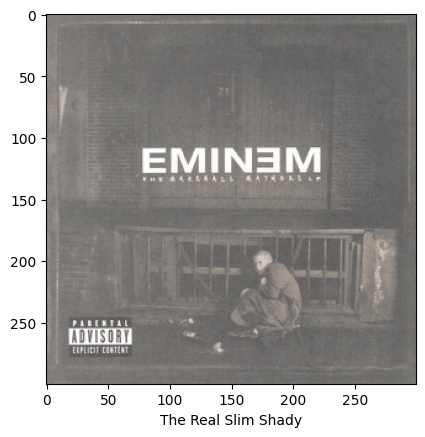

In [61]:
import matplotlib.pyplot as plt
from skimage import io

# Achando o id
nome_musica = 'Eminem - The Real Slim Shady'
id = dados[dados['artists_song']==nome_musica]['id'].iloc[0]

# Requisição API
track = sp.track(id)
url=track["album"]["images"][1]["url"]
name=track["name"]

# Mostrando imagem dos albuns
image=io.imread(url)
plt.imshow(image)
plt.xlabel(name,fontsize=10)
plt.show()

## Recomendando diversas músicas - Playlist

In [62]:
def get_id(playlist_id):
  urls = []
  names= []

  for i in playlist_id:
    track = sp.track(i)
    urls.append(track["album"]["images"][1]["url"])
    names.append(track["name"])

  return urls, names


In [63]:
urls_m, names_m = get_id(recomendada['id'])

In [64]:
def visualize_songs(name, url):

    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in enumerate(url):
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)

        # Para deixar o eixo Y invisível
        ax.get_yaxis().set_visible(False)

        # xticks define o local que vamos trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color = 'w', fontsize = 0.1)

        # yticks define o local que vamos trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color = 'w', fontsize = 0.1)

        # Colocando o nome da música no eixo x
        plt.xlabel(name[i], fontsize = 8)

        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
        plt.tight_layout(h_pad=0.7, w_pad=0)

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)

        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=None)
    plt.show()

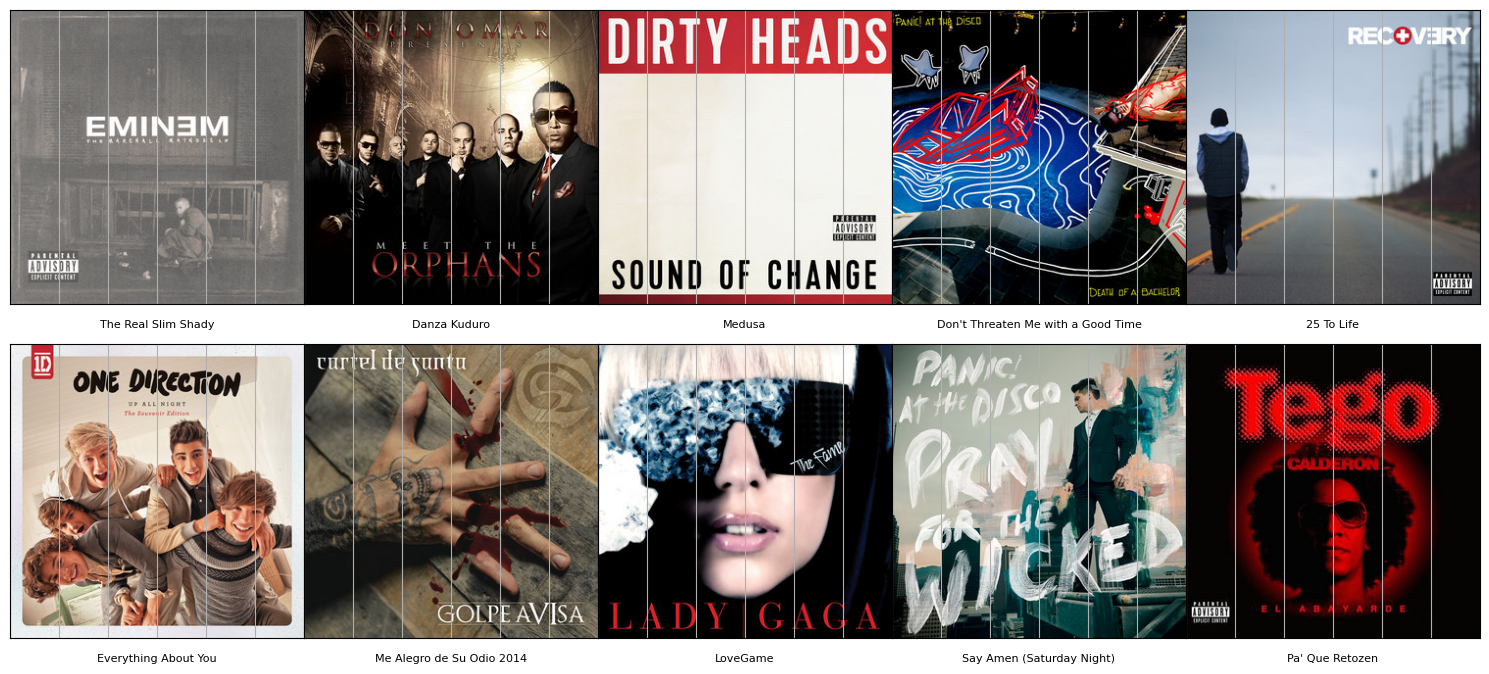

In [65]:
visualize_songs(names_m,urls_m)

## Recomendador

In [66]:
def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
  y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(10)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      plt.tick_params(bottom = False)
  plt.show()

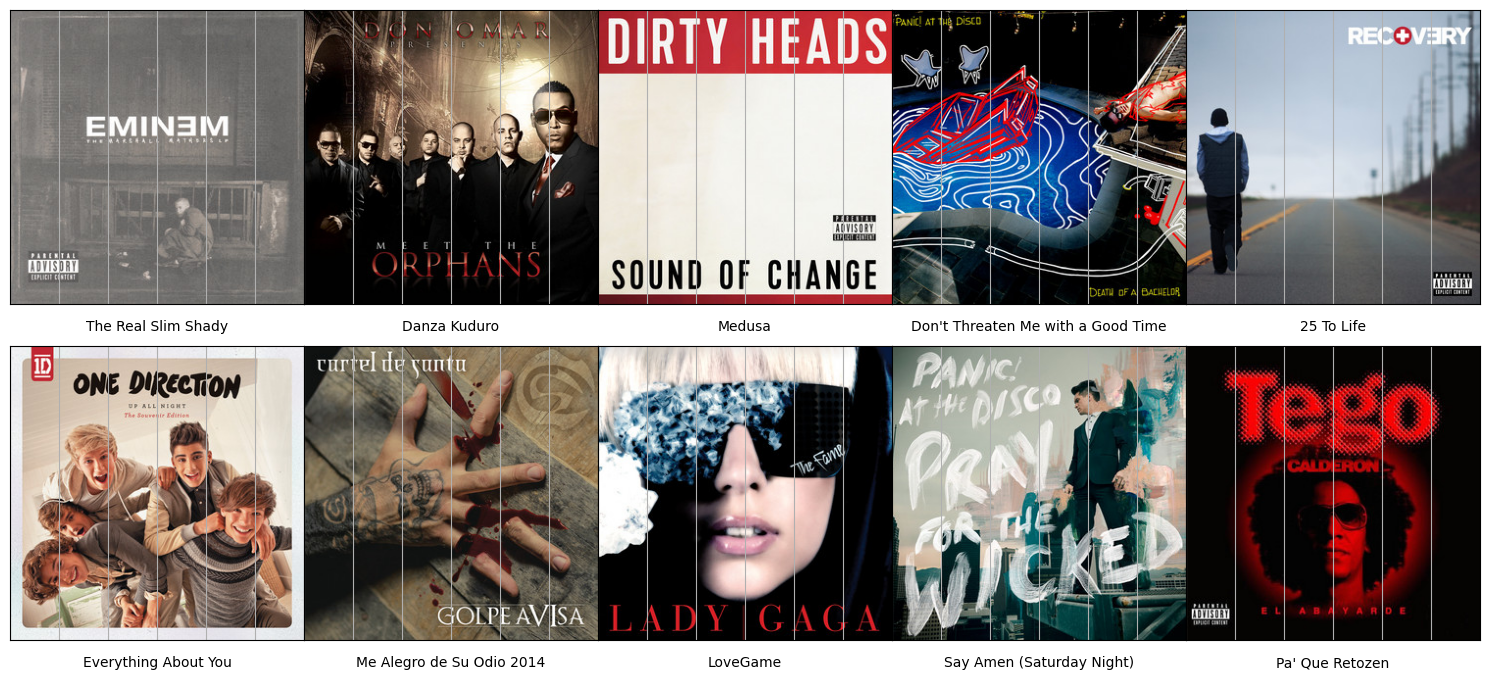

In [67]:
recomendador('Eminem - The Real Slim Shady')